In [8]:
import pandas as pd


tabela = pd.read_excel('analise-investimentos.xlsx')
tabela = tabela.dropna(axis=1)
display(tabela)

,Ativo,Tipo de ativo,Preço(cota),Num. de cotas,Rend p/ cota,Renda p/ aporte
0,knri11,FII,142.02,0,0.65,0
1,xpcm11,FII,39.40,0,0.60,0
2,btlg11,FII,112.50,0,0.65,0
3,hglg11,FII,169.04,0,0.80,0
4,bcff11,FII,84.82,0,0.50,0
5,alzr11,FII,120.50,0,0.52,0


In [9]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

nav = webdriver.Chrome()
for fii in tabela['Ativo']:
    nav.get(f'https://fiis.com.br/{fii}/')
    rendimento = nav.find_element_by_xpath("/html/body/div[4]/section[2]/div[1]/table/tbody/tr/td[2]/h3[1]").text
    preco = nav.find_element_by_xpath('/html/body/div[4]/section[3]/div/div/div[3]/div/div[1]/span[2]').text
    tabela.loc[tabela['Ativo'] == fii, 'Rend p/ cota'] = float(rendimento[2:].replace(',', '.'))
    tabela.loc[tabela['Ativo'] == fii, 'Preço(cota)'] = float(preco.replace(',', '.'))
nav.quit()

tabela['Num. de cotas'] = 10000//tabela['Preço(cota)']
tabela['Renda p/ aporte'] = tabela['Num. de cotas']*tabela['Rend p/ cota']
tabela.to_excel("analise-investimentos_atualizada.xlsx", index=False)

In [10]:
import pandas as pd
precos = pd.read_excel('preco-cota.xlsx').drop('Unnamed: 11', axis=1)
precos = precos.set_index('Ativo').T
precos.to_excel("precos-cota.xlsx", index=False)
print(precos)

Ativo  knri11  xpcm11  btlg11  hglg11  bcff11  alzr11
mes1   165.03   59.59  105.70  169.99   91.00  138.51
mes2   158.73   61.62  104.79  164.00   90.82  134.68
mes3   159.25   48.00  112.94  167.70   89.80  128.10
mes4   162.32   50.01  106.00  181.00   89.93  123.10
mes5   159.80   58.26  110.20  179.65   95.20  127.20
mes6   158.29   40.63  118.23  179.00   92.50  131.00
mes7   152.73   40.43  113.95  175.99   90.40  124.50
mes8   149.15   42.90  112.10  174.00   85.59  130.28
mes9   143.72   40.00  113.02  169.54   87.50  126.29
mes10  138.61   41.90  113.04  168.60   85.99  119.72


In [11]:
import pandas as pd
rends = pd.read_excel('redimentos-cota.xlsx')
rends = rends.set_index('Ativo').T
rends.to_excel("rendimentos-cota.xlsx", index=False)
display(rends)

Ativo,knri11,xpcm11,btlg11,hglg11,bcff11,alzr11
mes1,0.65,0.97,0.33,0.60,0.45,0.57
mes2,0.65,0.97,0.60,0.78,0.45,0.36
mes3,0.65,0.97,0.60,0.78,0.50,0.37
mes4,0.65,1.32,0.60,2.63,0.53,0.38
mes5,0.69,0.38,0.60,0.78,0.53,0.39
mes6,0.69,0.38,0.60,0.78,0.56,0.49
mes7,0.69,0.38,0.60,0.78,0.56,0.59
mes8,0.69,0.39,0.63,0.78,0.56,0.61
mes9,0.69,0.39,0.70,1.00,0.50,0.68
mes10,0.69,0.41,0.70,2.20,0.50,0.67


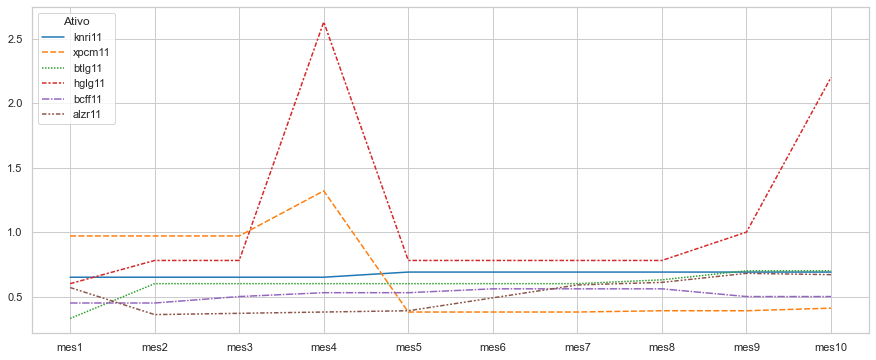

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15,6))
sns.lineplot(data=rends, palette="tab10")
plt.show()

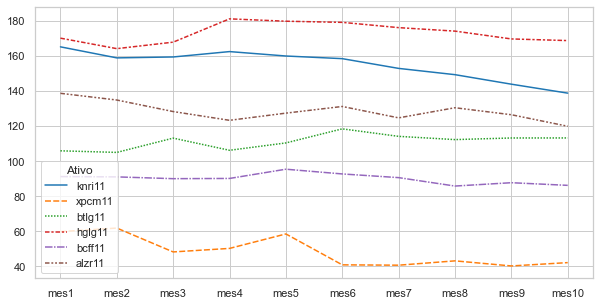

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,5))
sns.lineplot(data=precos, palette="tab10")
plt.show()